In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [3]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, Y = fetch_openml('mnist_784', return_X_y=True)
print(f"shape of X is {X.shape}")

shape of X is (70000, 784)


<Figure size 432x288 with 0 Axes>

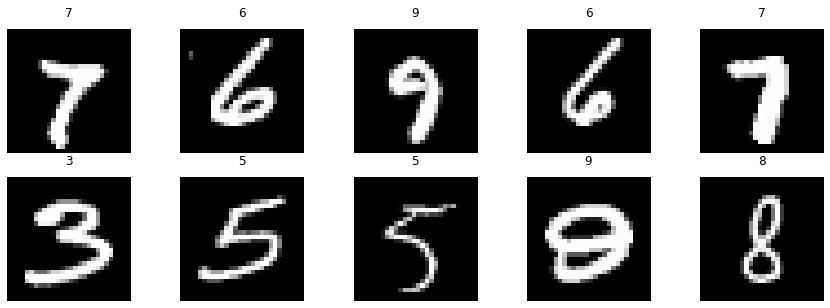

In [4]:
plt.gray()
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

for i, num in enumerate(numpy.random.choice(X.shape[0], 10)):
    axes[i // 5, i % 5].matshow(X[num].reshape(28, 28))
    axes[i // 5, i % 5].set_title(Y[num])
    axes[i // 5, i % 5].axis('off')

plt.show()

In [5]:
test_shuffle = numpy.random.permutation(X.shape[0])

X_test, X_train = X[test_shuffle[:10000]], X[test_shuffle[10000:]]
Y_test, Y_train = Y[test_shuffle[:10000]], Y[test_shuffle[10000:]]

print(f"train size: {X_train.shape[0]}")
print(f"test size: {X_test.shape[0]}")

train size: 60000
test size: 10000


In [14]:
model = SVC(C=1.0, random_state=7)
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
y_pred = model.predict(X_test)
print(f"test score is {f1_score(Y_test, y_pred, average='micro')}")

test score is 0.9804
